# Conhecendo a base de dados

## Importando os dados


In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv", sep=";")
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## Características gerais da base de dados

In [46]:
df.shape

(32960, 9)

In [47]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [49]:
media_total = df["Valor"].mean()

In [50]:
df_preco_tipo = df.groupby("Tipo")[["Valor"]].mean().sort_values("Valor")

<Axes: xlabel='Tipo'>

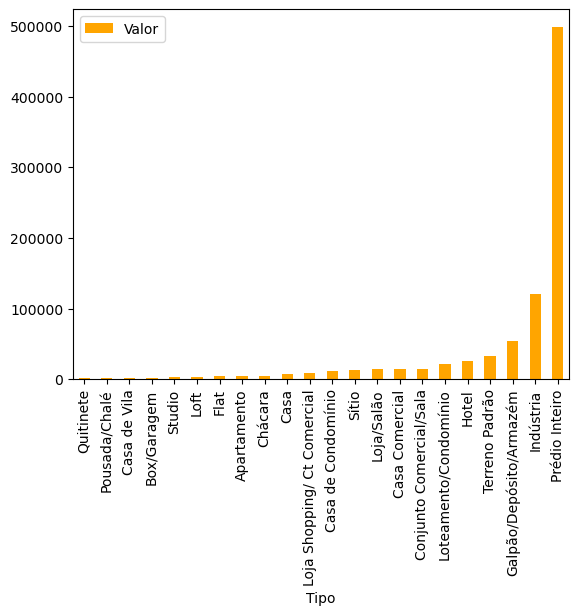

In [51]:
df_preco_tipo.plot(kind="bar", color = "orange")

## Removendo os imóveis comerciais

In [52]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [53]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [54]:
df_imoveis_comerciais = df.query('@imoveis_comerciais in Tipo')

In [55]:
df_imoveis_comerciais_preco = df_imoveis_comerciais.groupby('Tipo')[["Valor"]].mean().sort_values('Valor')

<Axes: xlabel='Tipo'>

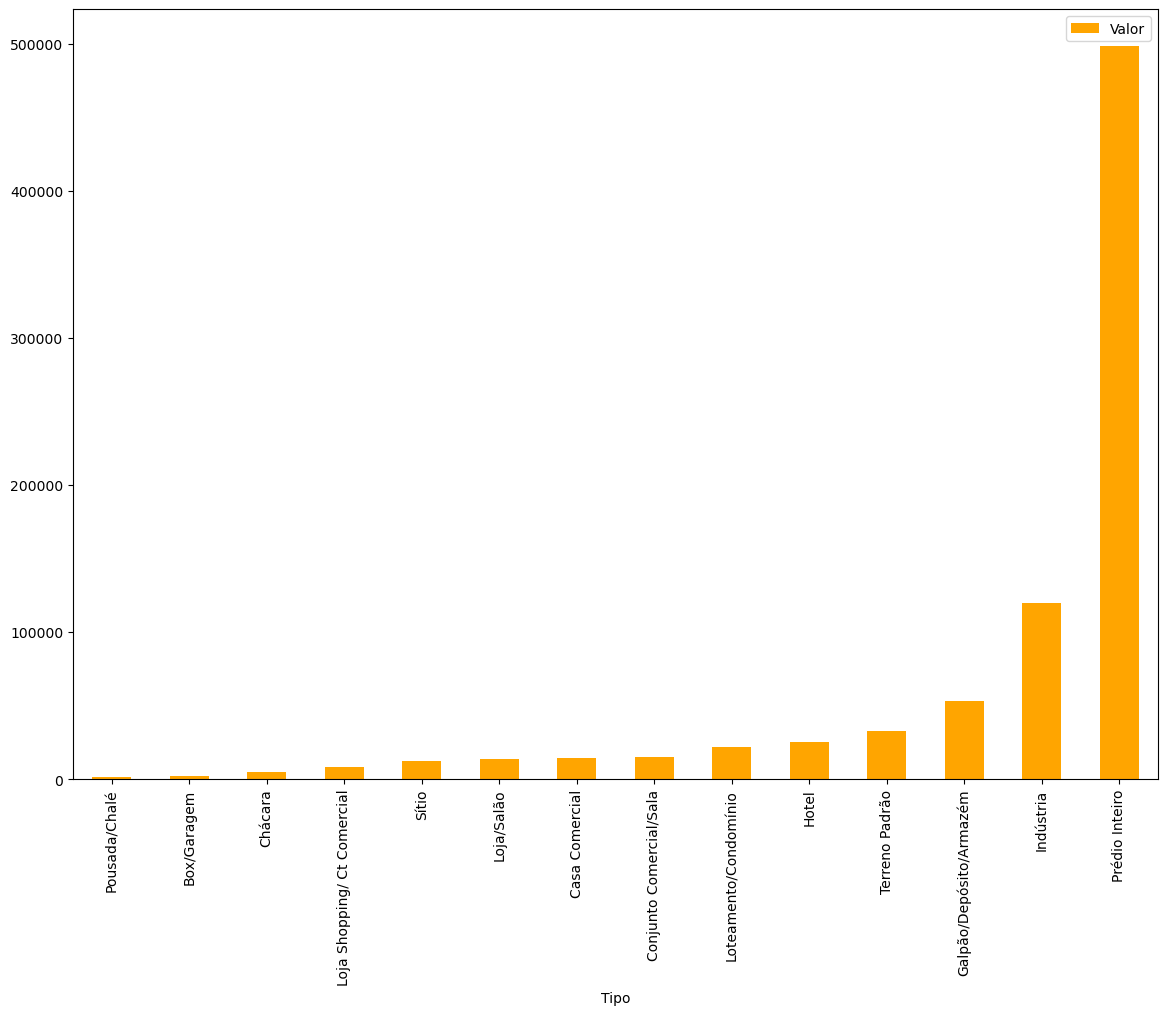

In [56]:
df_imoveis_comerciais_preco.plot(kind='bar', figsize=(14, 10), color='orange')

In [57]:
df_imoveis_residenciais = df.query('@imoveis_comerciais not in Tipo')

In [58]:
df_imoveis_residenciais_preco = df_imoveis_residenciais.groupby('Tipo')[["Valor"]].mean().sort_values('Valor')

<Axes: xlabel='Tipo'>

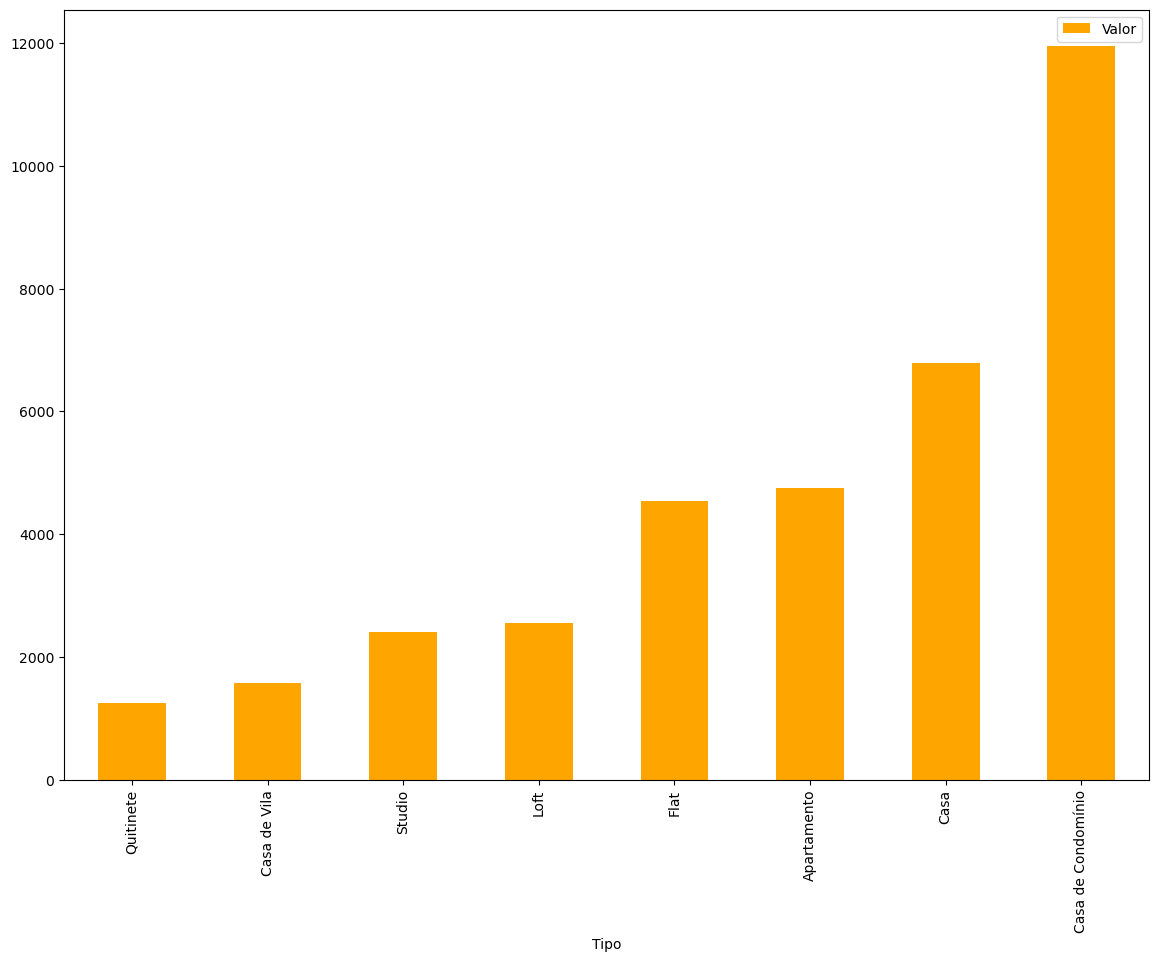

In [59]:
df_imoveis_residenciais_preco.plot(kind="bar", figsize=(14, 10), color = "orange")

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [60]:
df_imoveis_residenciais.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [61]:
df_porcentual_tipo = df_imoveis_residenciais.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

<Axes: xlabel='Tipos', ylabel='Percentual'>

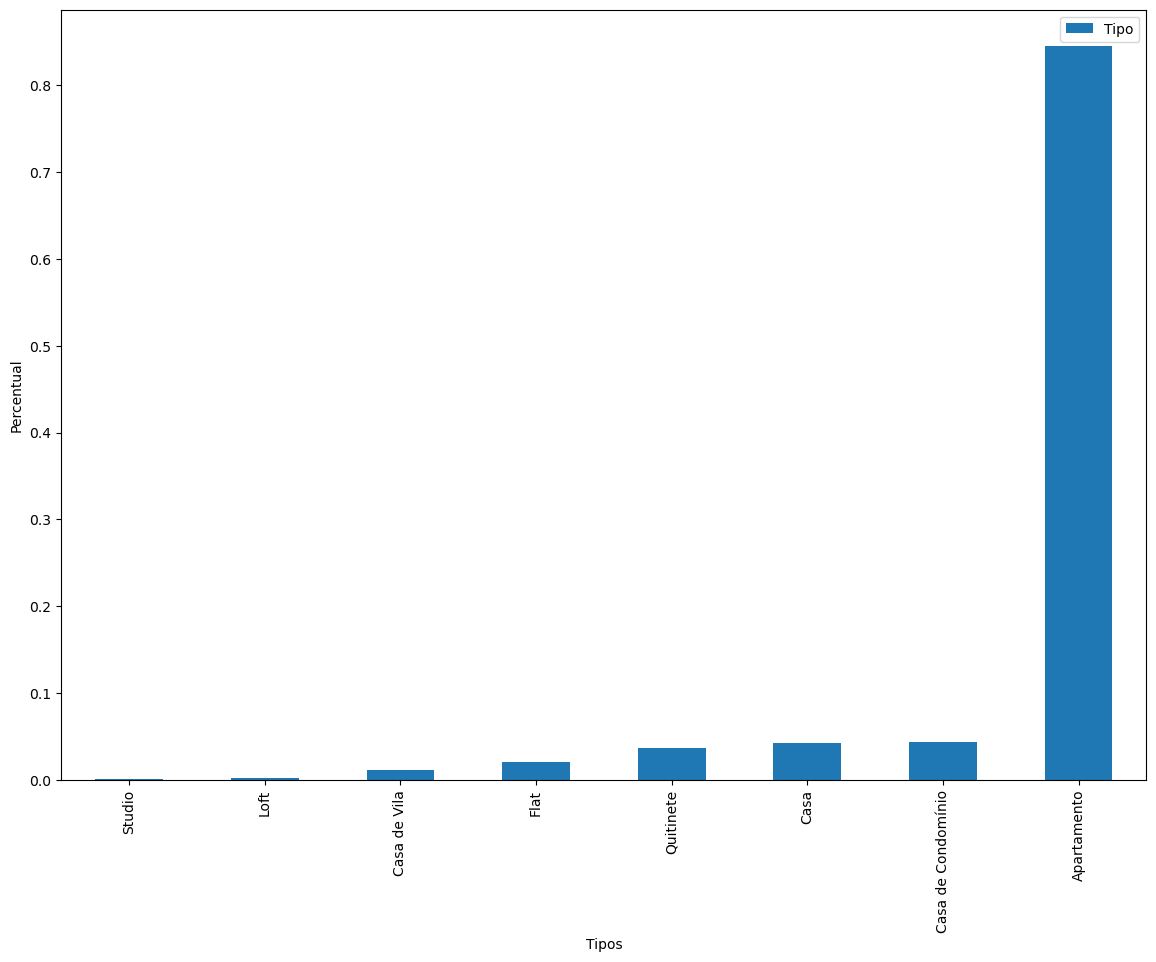

In [62]:
df_porcentual_tipo.plot(kind='bar', figsize=(14, 10),  xlabel = 'Tipos', ylabel = 'Percentual')

### **Selecionando apenas os imóveis do tipo apartamento**

In [63]:
df_apartamentos = df.query('Tipo == "Apartamento"')
df_apartamentos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


# Tratando e filtrando os dados

## Lidando com dados nulos

In [64]:
df_apartamentos.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [65]:
df_apartamentos.fillna(0, inplace=True)
df_apartamentos.isnull().sum()

C:\Users\Cleiton\AppData\Local\Temp\ipykernel_12396\1031849395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamentos.fillna(0, inplace=True)


Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

## Removendo registros

In [66]:
resistro_a_remover = df_apartamentos.query('Valor == 0 | Condominio == 0').index

In [67]:
df_apartamentos.drop(resistro_a_remover, axis=0, inplace=True)

C:\Users\Cleiton\AppData\Local\Temp\ipykernel_12396\3643945737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamentos.drop(resistro_a_remover, axis=0, inplace=True)


In [68]:
df_apartamentos.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [69]:
df_apartamentos.drop('Tipo', axis=1, inplace=True)

C:\Users\Cleiton\AppData\Local\Temp\ipykernel_12396\2185037838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamentos.drop('Tipo', axis=1, inplace=True)


In [70]:
df_apartamentos.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [71]:
selecao1 = df['Quartos'] == 1

In [72]:
selecao2 = df['Valor'] < 1200

In [73]:
selecao_final_1 = selecao1 & selecao2

In [74]:
df_apartamentos[selecao_final_1]

C:\Users\Cleiton\AppData\Local\Temp\ipykernel_12396\2666357379.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_apartamentos[selecao_final_1]


,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [75]:
df_apartamentos_1 = df_apartamentos[selecao_final_1]

C:\Users\Cleiton\AppData\Local\Temp\ipykernel_12396\4252479671.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_apartamentos_1 = df_apartamentos[selecao_final_1]


### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [76]:
selecao_final_2 = (df_apartamentos['Quartos'] >= 2) & (df_apartamentos['Valor'] < 3000) & (df_apartamentos['Area'] > 70)

In [77]:
df_apartamentos[selecao_final_2]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


In [78]:
df_apartamentos_2 = df_apartamentos[selecao_final_2]

## Salvando os dados

In [79]:
df_apartamentos.to_csv('dados_apartamentos.csv', index=False, sep=';')

In [80]:
pd.read_csv('dados_apartamentos.csv', sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Manipulando os dados

## Criando colunas numéricas

In [81]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')


In [82]:
dados["Valor_mensal"] = dados["Valor"] + dados["Condominio"]
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_mensal
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [83]:
dados["valor_anual"] = dados["Valor_mensal"]*12 + dados["IPTU"]
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_mensal,valor_anual
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


## Criando colunas categóricas

In [84]:
dados["Descricao"] = dados["Tipo"] + " no Bairro " + dados["Bairro"] + " com " + dados["Quartos"].astype(str) + " quarto(s) e " + dados["Vagas"].astype(str) + " vagas de garagem."
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_mensal,valor_anual,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete no Bairro Copacabana com 1 quarto(s)...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa no Bairro Jardim Botânico com 2 quarto(s)...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala no Bairro Barra da Tij...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento no Bairro Centro com 1 quarto(s) e...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento no Bairro Higienópolis com 1 quart...


In [85]:
dados["Possui_suite"] = dados["Suites"].apply(lambda x: "Sim" if x > 0 else "Não")
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_mensal,valor_anual,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete no Bairro Copacabana com 1 quarto(s)...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa no Bairro Jardim Botânico com 2 quarto(s)...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala no Bairro Barra da Tij...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento no Bairro Centro com 1 quarto(s) e...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento no Bairro Higienópolis com 1 quart...,Não


In [86]:
dados.to_csv('dados_completos_dev.csv', index=False, sep=';')